In [22]:
import pandas as pd
train_data = pd.read_csv("train Data.csv")
train_data.set_index('id', inplace=True)

C:\Users\New-User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (329,331,333,336,338,344,345,346,348,354,355,356,357,358,361,362,364,367,372,377,380,383,385,387,390,392,399,400,406,408,409,413,416,418,419,431,433,437,438,442,448,449,450,453,457,464,473,478,479,481,483,485,486,489,492,495,496,497,498,499,500,503,507,508,510,511,514,515,517,519,520,521,522,523,524,526,527,530,534,537,538,539,541,544,547,548,549,550,551,557,558,560,564,569,572,573,576,577,579,583,596,597,598,600,601,602,604,605,606,608,609,613,619,620,625,627,628,629,631,632,633,636,641,642,643,645,646,647,648,651,655,661,662,665,668,675,676,679,682,685,687,689,690,691,694,698,701,702,703,706,711,712,713,719,720,721,733,735,737,738,742,746,747,748,749,752,754,755,760,764,768,770,781,782,789,797,807,812,814,817,818,822,823,824,825,832,840,843,844,845,850,853,857,858,861,867,868,873,874,876,877,879,880,881,883,886,890,893,897,899,900,901,902,904,905,908,909,910,912,913,914,915,916,

In [2]:
import torch
import numpy as np

In [24]:
train_labels = pd.read_csv("train labels.csv")
train_labels.set_index('id', inplace=True)

In [25]:
train_data.dropna(thresh=int(len(train_data)/ 2), axis=1, inplace=True)

In [26]:
# real values
train_data.fillna(train_data.mean(), inplace=True)
# Categorical Values
train_data.fillna(train_data.mode().iloc[0], inplace=True)

In [27]:
train_data = train_data.round(2)

In [28]:
train_data.head()

,release,n_0002,n_0005,n_0012,n_0019,n_0034,n_0038,n_0047,n_0050,n_0052,...,c_1326,c_1328,c_1330,c_1333,c_1335,c_1343,c_1348,c_1361,c_1363,c_1372
id,,,,,,,,,,,,,,,,,,,,,
11193,a,0.03,0.37,0.29,0.0,0.22,0.19,1,1,1,...,g,b,a,e,w,b,b,e,b,a
11382,a,0.03,0.32,0.24,0.0,0.10,0.18,1,1,1,...,s,b,a,e,q,b,b,e,b,a
16531,a,0.02,0.34,0.30,0.0,0.12,0.29,1,1,1,...,t,a,b,e,u,a,b,c,a,a
1896,a,0.04,0.45,0.21,0.0,0.15,0.37,1,1,1,...,g,b,b,e,w,a,b,g,a,a
18262,c,0.04,0.32,0.22,0.0,0.07,0.18,1,1,1,...,w,a,a,e,b,b,b,e,b,a


In [39]:
gh = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]) 
gj = np.array([-3.9752, -3.4848, -2.9720, -4.7062, -4.1345, -3.9000, -4.2158, -4.1687, -4.5050,  4.8135,  4.0907, -4.6027, -4.5086, -5.3354])

In [40]:
gj[gj < 0] = 0 
gj[gj > 0] = 1
print(gj)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]


In [29]:
# train_data.to_csv("X_train_RE.csv")
# train_labels.to_csv("y_train_RE.csv")

In [3]:
from sklearn.utils import Bunch

In [10]:
h = Bunch(data=train_data, target=train_labels)


In [11]:
# h.data.loc[997]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test \
        = train_test_split(h.data, h.target, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val \
        = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [13]:
%conda install torchvision -c pytorch

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.10.14-0, anaconda/win-64::openssl-1.1.1h-he774522_0
  - anaconda/win-64::ca-certificates-2020.10.14-0, defaults/win-64::openssl-1.1.1h-he774522_0
  - anaconda/win-64::openssl-1.1.1h-he774522_0, defaults/win-64::ca-certificates-2020.10.14-0
  - defaults/win-64::ca-certificates-2020.10.14-0, defaults/win-64::openssl-1.1.1h-he774522_0done

# All requested packages already installed.




In [14]:
%conda install -c anaconda opencv

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
import cv2
def data2img(arr, font_size=50, resolution=(256, 256), font=cv2.FONT_HERSHEY_SIMPLEX):
    """ Structured Tabular Data to Image with cv2

        NOTE currently supports only iris and wine dataset
    """
    x, y = resolution
    n_colums, n_features = 2, len(arr)
    n_lines = n_features % n_colums + int(n_features / n_colums)
    frame = np.ones((*resolution, 3), np.uint8)*0

    k = 0
    dataset='mltoy'
    # ----- iris -----
    if dataset=='iris':
        for i in range(n_colums):
            for j in range(n_lines):
                try:
                    cv2.putText(
                        frame, str(arr[k]), (30+i*(x//n_colums), 5+(j+1)*(y//(n_lines+1))),
                        fontFace=font, fontScale=1, color=(255, 255, 255), thickness=2)
                    k += 1
                except IndexError:
                    break

    # ----- wine -----
    elif dataset=='wine':
        for i in range(n_colums):
            for j in range(n_lines):
                try:
                    cv2.putText(
                        frame, str(arr[k]), (30+i*(x//n_colums), 5+(j+1)*(y//(n_lines+1))),
                        fontFace=font, fontScale=0.6, color=(255, 255, 255), thickness=1)
                    k += 1
                except IndexError:
                    break

    # ----- toy -----
    elif dataset=='mltoy':
        for i in range(n_colums):
            for j in range(n_lines):
                try:
                    cv2.putText(
                        frame, str(arr[k]), (10+i*(x//n_colums), 5+(j+1)*(y//(n_lines+1))),
                        fontFace=font, fontScale=0.2, color=(255, 255, 255), thickness=1)
                    k += 1
                except IndexError:
                    break


    return np.array(frame, np.uint8)

In [16]:
from torch.utils.data import DataLoader, Dataset, TensorDataset
class CustomTensorDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data[0])

    def __getitem__(self, index):
#         x = self.data[0][index]
#         print(self.data[0],index)
#         print(self.data[0].loc[0])
        x = self.data[0].loc[index]
            
        img = data2img(x)
        if self.transform:
            x = self.transform(img)

        y = self.data[1].loc[index]
        return x, y

In [17]:
from torchvision import transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
kwargs = {} if device=='cpu' else {'num_workers': 2, 'pin_memory': True}
loader_kwargs = {'batch_size':4, **kwargs}

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])
# x_train.reset_index(inplace=True)
# y_train.reset_index(inplace=True)
# Build Dataset
train_data = CustomTensorDataset(data=(x_train, y_train), transform=transform)
val_data   = CustomTensorDataset(data=(x_val, y_val), transform=transform)
test_data  = CustomTensorDataset(data=(x_test, y_test), transform=transform)

# Build Dataloader
train_loader = DataLoader(train_data, shuffle=True, **loader_kwargs)
val_loader   = DataLoader(val_data, shuffle=True, **loader_kwargs)
test_loader  = DataLoader(test_data, shuffle=False, **loader_kwargs)


In [18]:
import matplotlib.pyplot as plt

In [19]:
# for e, (imgs, labels) in enumerate(train_loader):
#     print(e,imgs,labels)
#     break
for e, (imgs, labels) in enumerate(train_data):
    print(len(imgs[0]))
    break
# print(y_train.head())
print(x_train.head(1))


    

256
     release  n_0002  n_0005  n_0012  n_0019  n_0034  n_0038  n_0047  n_0050  \
id                                                                             
7905       c    0.05    0.29    0.15     0.2    0.19    0.18       1       1   

      n_0052  ...  c_1326  c_1328  c_1330  c_1333  c_1335  c_1343  c_1348  \
id            ...                                                           
7905       1  ...       g       b       a       b       w       b       b   

      c_1361  c_1363  c_1372  
id                            
7905       h       b       a  

[1 rows x 219 columns]


torch.Size([256, 256])


IndexError: too many indices for tensor of dimension 2

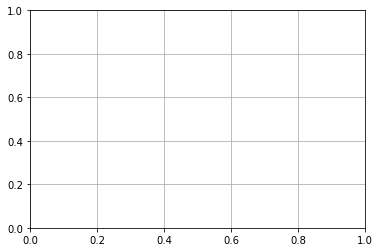

In [20]:
for i, (x_imgs, labels) in enumerate(train_data):
    #g+=1
    print(x_imgs[0].shape)
    plt.grid()
    plt.imshow(x_imgs[0][0, :, :]) # plt.imshow(x_imgs[0][0, :, :])
    plt.show()
    g+=1
    break

In [74]:
# a =[[-0.,  0., -0.,  0.,  1.,  1., -0.,  0.,  0., -0., -1., -0., -0.,  1.],[ 0., -0.,  0., -0.,  1.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.]] 
# b = [[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]]
from sklearn.metrics import f1_score
a = [[0,0,0,1,1],[1,0,0,1,1]]
b = [[0,0,0,1,1],[1,1,0,1,1]]
accuracy_score = []

for tru,pred in zip (a, b):
    accuracy_score.append(f1_score(tru,pred,average='micro'))

print(np.mean(accuracy_score))
# f1(a,b)

0.9000000000000001


In [67]:
def precision(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    len1 = len(y_pred)
    if len1 == 0:
        return 0
    else:
        return len(i) / len1


def recall(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    return len(i) / len(y_true)


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    else:
        return 2 * (p * r) / (p + r)

In [41]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [ ]:
# y_train.head()

In [21]:
# train_data.to_csv("X_train_RE.csv")
# train_labels.to_csv("y_train_RE.csv")

AttributeError: 'CustomTensorDataset' object has no attribute 'to_csv'

In [14]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.features1 = nn.Sequential(
            nn.Conv2d(3, 6, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 12, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.features2 = nn.Sequential(
            nn.Conv2d(1, 6, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 12, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(12*6*6, 64)
        self.fc2 = nn.Linear(12*6*6, 64)
        
        self.my1 = nn.Linear(128,1)
        self.my2 = nn.Linear(128,1)
        
        self.fc_out = nn.Linear(128, 10)
        
    def forward(self, x1, x2, classnr=0):
        x1 = self.features1(x1)
        x1 = x1.view(x1.size(0), -1)
        x1 = F.relu(self.fc1(x1))
        print(x1.shape)
        
        x2 = self.features2(x2)
        x2 = x2.view(x2.size(0), -1)
        x2 = F.relu(self.fc2(x2))

        # Concatenate in dim1 (feature dimension)
        x = torch.cat((x1, x2), 1)
        
        if classnr == 0:
            return self.my1(x)
        elif classnr == 1:
            return self.my2(x)
        x = self.fc_out(x)
        return x

model = MyModel()
x1 = torch.randn(1, 3, 24, 24)
x2 = torch.randn(1, 1, 24, 24)
output = model(x1, x2, 0)
print(output)
output2 = model(x1, x2, 1)
print(output2)

torch.Size([1, 64])
tensor([[-0.0750]], grad_fn=<AddmmBackward>)
torch.Size([1, 64])
tensor([[-0.0750]], grad_fn=<AddmmBackward>)
torch.Size([1, 64])
tensor([[0.0171]], grad_fn=<AddmmBackward>)


In [2]:
import numpy as np
a = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]])

In [5]:
a[...,0]

array([1, 1, 0, 0, 1, 0, 1, 1])